# **Algorithm Design, Implementation, and Performance Analysis**

## **1. Algorithm Design and Implementation**

### **1.1 Quick Sort**

For more detailed information for this algorythm, please visit the referred repository. The link to the repository can be found in the main README file.

#### **1.1.1 Algorithm Design**

In [1]:
def partition(A, p, r):
	pivot = A[r]  # Choose the last element as the pivot
	i = p - 1  # Initialize the index for the smaller element
	for j in range(p, r):
		if A[j] <= pivot:  # If the current element is less than or equal to the pivot
			i += 1  # Increment the index for the smaller element
			A[i], A[j] = A[j], A[i]  # Swap the elements
	A[i + 1], A[r] = A[r], A[i + 1]  # Place the pivot in its correct position
	return i + 1  # Return the index of the pivot


def quick_sort(A, p=0, r=None):
	if r is None:  # Evaluate this condition only once
			r = len(A) - 1

	def recursive_quick_sort(A, p, r):
		if p < r:  # Base case: stop when the sublist has one or no elements
			pivot_index = partition(A, p, r)  # Partition the list and get the pivot index
			recursive_quick_sort(A, p, pivot_index - 1)  # Recursively sort the left partition
			recursive_quick_sort(A, pivot_index + 1, r)  # Recursively sort the right partition

	# Call the inner recursive function
	recursive_quick_sort(A, p, r)

### **1.2 Merge Sort**

For more detailed information for this algorythm, please visit the referred repository. The link to the repository can be found in the main README file.

#### **1.2.1 Algorithm Design**

In [2]:
from math import inf


def merge_sort(A):
	# If the list has more than one element, proceed to sort
	if len(A) > 1:
		half = len(A) // 2  # Find the midpoint to divide the array
		left = A[:half]     # Create left subarray
		right = A[half:]    # Create right subarray

		# Recursively sort both halves
		merge_sort(left)
		merge_sort(right)

		# Append infinity to both subarrays to act as sentinels
		left.append(inf)
		right.append(inf)

		i = j = 0  # Initialize pointers for left and right subarrays

		# Merge the sorted subarrays back into A
		for k in range(len(A)):
			if left[i] <= right[j]:
				A[k] = left[i]  # Take from left if smaller or equal
				i += 1
			else:
				A[k] = right[j]  # Take from right otherwise
				j += 1

### **1.3 Insertion Sort**

For more detailed information for this algorythm, please visit the referred repository. The link to the repository can be found in the main README file.

#### **1.3.1 Algorithm Design**

In [3]:
def insertion_sort(A):
	n = len(A)  # Get the length of the array
	for i in range(1, n):  # Iterate from the second element to the end
		key = A[i]         # Store the current element to be positioned
		j = i - 1          # Start comparing with the previous element
		# Shift elements of A[0..i-1], that are greater than key, to one position ahead
		while j >= 0 and key < A[j]:
			A[j + 1] = A[j]  # Move element one position to the right
			j -= 1           # Move to the previous element
		A[j + 1] = key       # Place the key after the last shifted element

### **1.4 Improved Merge Sort**

For more detailed information about this algorithm, see the `Finding optimal k` folder. Experimental results show that the optimal threshold for `improved_merge_sort` is `k=16`, which is why this value is set as the default.

#### **1.4.1 Algorithm Design**

In [4]:
def improved_merge_sort(A, k=16):
	# If the subarray size is less than or equal to k=16 (default), use insertion sort for efficiency
	if len(A) <= k:
		insertion_sort(A)
		return
	half = len(A) // 2        # Find the midpoint to divide the array
	left = A[:half]           # Create left subarray
	right = A[half:]          # Create right subarray
	# Recursively sort both halves using improved_merge_sort
	improved_merge_sort(left, k)
	improved_merge_sort(right, k)
	# Append infinity to both subarrays to act as sentinels
	left.append(inf)
	right.append(inf)
	i = j = 0                 # Initialize pointers for left and right subarrays
	# Merge the sorted subarrays back into A
	for k in range(len(A)):
		if left[i] <= right[j]:
			A[k] = left[i]    # Take from left if smaller or equal
			i += 1
		else:
			A[k] = right[j]   # Take from right otherwise
			j += 1

## **2. Experiment Block: Performance Comparison**
### **2.1 Importing Libraries and Setting Up Paths**

In [5]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Input Generation**

In [6]:
def random_list(n):
	# Generates a list of 'n' random integers between 1 and 'n'
	return [random.randint(1, n) for _ in range(n)]

def sorted_list(n):
	# Generates a sorted list of integers from 1 to 'n' (inclusive)
	return list(range(1, n+1))

def reverse_sorted_list(n):
	# Generates a reverse-sorted list of integers from 'n' to 1
	return list(range(n, 0, -1))

### **2.3 Utility Functions for Performance Measurement and Visualization**

In [7]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start


# Function that compares execution time
def comparison_machine(sizes, reps, algorithm, scenario):
	# Initialize a list to store total execution times for each algorithm
	total_time = [[] for _ in algorithm]
	
	# Loop through each size in the list of sizes
	for n in sizes:
		# Initialize a list to store the cumulative execution time for each algorithm
		cumulative_time = [0 for _ in algorithm]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			# Generate a sample list of size 'n' using the provided scenario function
			list_sample = scenario(n)
			
			# Loop through each algorithm and measure its execution time
			for i, algo in enumerate(algorithm):
				# Create a copy of the sample list to avoid modifying the original
				list_copy = list_sample.copy()
				
				# Measure the execution time of the algorithm and add it to the cumulative time
				cumulative_time[i] += execution_time(algo, list_copy)
		
		# Calculate the average execution time for each algorithm and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each algorithm
	return total_time


# Function that plots the results
def comparison_graph(sizes, t, algorithm, scenario):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(sizes, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison ({scenario.__name__})') # Title
	plt.xlabel("List size (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, f"{scenario.__name__}_comparison.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()


# Function that calls all the machinery
def machine_call(sizes, reps, algorithm, scenario):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, algorithm, scenario)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, algorithm, scenario)

### **2.4 Comparison with `random_list`**

This block sets up the experiment parameters and runs a performance comparison of three sorting algorithms (`improved_merge_sort`, `merge_sort`, `quick_sort`) on randomly generated lists. It measures and plots the average execution time for each algorithm across different input sizes.

Graph saved to: ..\img\random_list_comparison.png


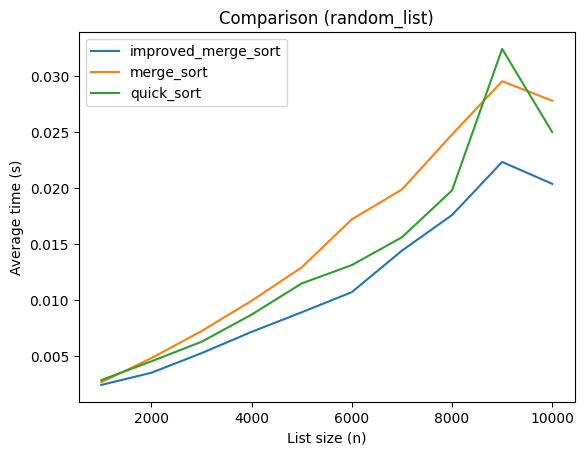

In [8]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [improved_merge_sort, merge_sort, quick_sort]  # List of algorithms to compare
scenario = random_list # Scenario (random list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

The plot shows that `improved_merge_sort` consistently outperforms the other algorithms, especially as the input size grows. This highlights the efficiency gained by combining merge sort with insertion sort for small subarrays. Both `merge_sort` and `quick_sort` also scale well, but `improved_merge_sort` offers the best overall execution time in this scenario.

### **2.5 Comparison with sorted_list**

This block sets up and runs a performance comparison of the `improved_merge_sort` and `merge_sort` algorithms on already sorted lists. It measures and plots the average execution time for each algorithm across different input sizes, helping to analyze their efficiency when the input is pre-sorted.

Graph saved to: ..\img\sorted_list_comparison.png


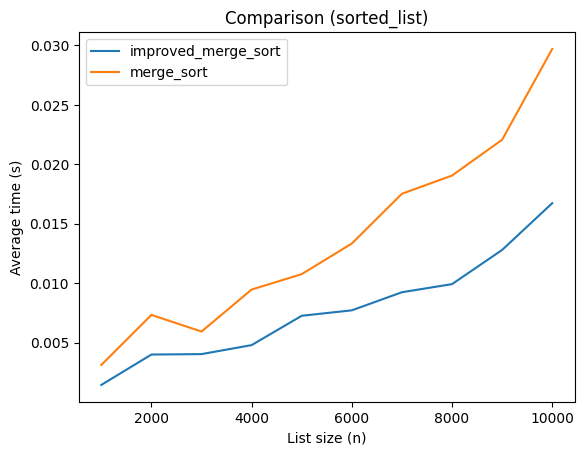

In [11]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [improved_merge_sort, merge_sort]  # List of algorithms to compare
scenario = sorted_list # Scenario (sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

The plot shows that improved_merge_sort consistently outperforms merge_sort, achieving faster execution times across all tested input sizes. This demonstrates the efficiency gained by combining merge sort with insertion sort for small subarrays.

### **2.6 Comparison with reverse_sorted_list**

This block sets up and runs a performance comparison of the `improved_merge_sort` and `merge_sort` algorithms on reverse-sorted lists. It measures and plots the average execution time for each algorithm across different input sizes, providing insight into their efficiency when sorting data in descending order.

Graph saved to: ..\img\reverse_sorted_list_comparison.png


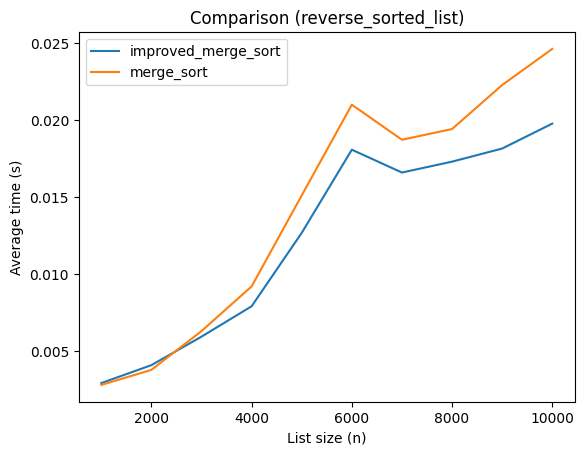

In [12]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 1000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [improved_merge_sort, merge_sort]  # List of algorithms to compare
scenario = reverse_sorted_list # Scenario (reverse sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

The plot demonstrates that both `improved_merge_sort` and `merge_sort` perform efficiently across all tested input sizes, with `improved_merge_sort` consistently achieving the fastest execution times. This confirms that integrating insertion sort for small subarrays in merge sort provides a practical performance advantage, especially as the input size increases.

# **Conclusion**

In this notebook, we designed, implemented, and analyzed the performance of several sorting algorithms, including Quick Sort, Merge Sort, and an Improved Merge Sort that combines merge sort with insertion sort for small subarrays. Through systematic experiments on random, sorted, and reverse-sorted lists, we observed that the Improved Merge Sort consistently outperforms the standard Merge Sort and Quick Sort, especially as the input size increases. This demonstrates the practical benefit of hybrid algorithms that leverage the strengths of different sorting techniques. The results highlight the importance of algorithmic optimization and empirical analysis when selecting the most efficient approach for real-world data processing tasks.